<h1>Capstone Project Module 2
<h3>Data Analysis
<h3>By Nabil Rakha Dwitya


<h3> Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning
4. Data Analysis
5. Conclusion
6. Recommendation

------

<h2>Business Problem Understanding

<h5>Berjalan-jalan atau traveling merupakan hal yang sering dilakukan oleh orang pada saat ini, terutama bagi orang-orang yang ingin menikmati wisata-wisata yang ada pada suatu kota di negara tertentu. Dengan hal seperti ini, muncullah sebuah bisnis yang bernama Airbnb. Airbnb merupakan sebuah platform online yang menyediakan sebuah layanan akomodasi bagi pengguna untuk menyewakan properti. Airbnb ini memungkinkan para penyedia atau host untuk menyediakan tempat tinggal, baik seperti rumah, hotel, apartemen, dan lain-lain kepada pengguna nantinya yang bisa mereka sewa dan mereka huni selama beberapa hari. Airbnb telah menjadi platform pilihan bagi para wisatawan yang mencari akomodasi unik dengan harga terjangkau. Namun, seiring dengan bertambahnya jumlah hunian, para host menghadapi berbagai tantangan, seperti menentukan harga yang kompetitif, memahami kondisi pasar, dan mengoptimalkan hunian mereka untuk meningkatkan tingkat hunian. Analisis ini bertujuan untuk memberikan wawasan berbasis data guna membantu para host di Bangkok memahami dinamika pasar yang kompleks. Dengan meneliti faktor-faktor penting seperti persaingan lokasi, dampak geografis terhadap harga, tingkat hunian, serta pengaruh ulasan, analisa ini menawarkan strategi praktis bagi para host untuk meningkatkan kualitas hunian mereka, menarik lebih banyak tamu, dan meningkatkan pendapatan. <br>

Masalah :
- Harga hunian mungkin berbeda secara signifikan antar wilayah. Hal ini mungkin berkaitan dengan lokasi wilayah yang dekat dengan pusat kota atau tempat populer di kota dan tipe ruangan sehingga host memiliki kesulitan dalam mementukan harga yang kompetitif.
- Jumlah hunian pada suatu wilayah mungkin masih rendah dibanding dengan wilayah-wilayah lainnya sehingga belum adanya pemerataan yang baik.
- Beberapa hunian mungkin tidak dapat di sewa karena alasan yang tidak diketahui.  
- Jumlah minimal tamu bermalam mungkin memengaruhi harga atau banyaknya frekuensi penyewaan.
- Beberapa hunian mungkin memiliki ulasan yang sangat rendah, yang dapat memengaruhi daya tarik bagi tamu baru. <br>

Tujuan :
- Untuk mengetahui atau mengidentifikasi wilayah, lokasi, serta tipe ruangan mana yang memiliki harga tinggi dan rendah sehingga bisa dilakukan penyesuaian terhadap faktor-faktor tersebut agar pemerataan harga bisa lebih terjangkau
- Identifikasi wilayah yang masih memiliki hunian yang sedikit sehingga bisa meningkatkan pengguna untuk mulai melirik wilayah-wilayah tersebut.
- Mengidentifikasi hunian-hunian yang tidak dapat di sewa untuk dapat menerapkan aturan yang ketat terhadap tempat sewa tersebut.  
- Host dapat mempertimbangkan aturan jumlah minimal bermalam agar mampu menarik lebih banyak pengguna atau tamu.
- Mulai mengembangkan cara untuk mendorong para pengguna melakukan review terhadap tempat sewa untuk meningkatkan kepercayaan pada tempat sewa tersebut.


<h2> Data Understanding

Dataset ini berisikan listing atau tempat sewa yang telah terdaftar oleh para penyedia tempat atau host pada Airbnb Bangkok yang dimana setiap baris merepresentasikan atribut-atribut tiap tempat sewa.

Informasi Atribut :
1. id : ID untuk tiap tempat sewa
2. name : Nama tempat sewa
3. host_id : ID untuk tiap host atau penyedia tempat
4. host_name : Nama penyedia tempat
5. neighbourhood : Wilayah tempat sewa berada
6. latitude : Titik latitude lokasi wilayah
7. longitude : Titik longitude lokasi wilayah
8. room_type : Jenis atau tipe tempat sewa, dimana terdapat 4 tipe, yaitu :
    - Entire home 
    - Private room
    - Hotel room
    - Shared room
9. price : Harga tempat sewa
10. minimum_nights : Jumlah minimal untuk bermalam di tempat sewa
11. number_of_reviews : Jumlah review yang dimiliki tempat sewa
12. last_review : Review terakhir kali tempat sewa tersebut
13. reviews_per_month : Jumlah review dalam per bulan 
14. calculated_host_listings_count : Jumlah listing atau tempat sewa yang dimiliki oleh host 
15. availability_365 : Ketersediaan tempat sewa dalam setahun
16. number_of_reviews_ltm : Jumlah review dalam 12 bulan terakhir

Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import normaltest, kruskal, chi2_contingency
import scikit_posthocs as sp
import folium.map

LOAD DATASET

In [3]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

Dari informasi mengenai yang ditampilkan dapat dilihat bahwa : <br>
Jumlah kolom = 17 kolom <br>
Jumlah baris atau data = 15845 data

Kolom yang tidak relevan adalah kolom Unnamed: 0

Data Numerikal :
1. id
2. host_id
3. latitude
4. longitude
5. price
6. minimum_nights
7. number_of_reviews
8. reviews_per_month
9. calculated_host_listings_count
10. availability_365
11. number_of_reviews_ltm

Data Kategorikal :
1. name
2. host_name
3. neighbourhood
4. room_type

Data Datetime :
1. last_review

Dapat dilihat bahwa kolom last_review pada dataset memiliki tipe data object yang seharusnya memiliki tipe data datetime sebagaimana mestinya. Hal ini akan dirubah pada saat data formatting



<h2>Data Cleaning

<H3>Data Formatting

In [5]:
# Convert 'reservation_status_date' column to datetime64
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review'].info

<bound method Series.info of 0       2020-01-06
1              NaT
2              NaT
3       2022-04-01
4              NaT
           ...    
15849          NaT
15850          NaT
15851          NaT
15852          NaT
15853          NaT
Name: last_review, Length: 15854, dtype: datetime64[ns]>

<H3>Data Duplicates

In [6]:
# Check for duplicated rows
print('Number of duplicated rows = ', df.duplicated().sum())

Number of duplicated rows =  0


Tidak terdapat data duplikasi pada dataset, hal ini terlihat dari ID listing yang dimana setiap baris memiliki ID yang berbeda sehingga tidak terdapat nilai data yang sama

<H3>Check Unique Value dan Data Kosong

In [7]:
# Display unique items from each column
def display_unique(df):
  listUniqueItem = []
  for col in df.columns :
      listUniqueItem.append( [col, df[col].nunique(), df[col].isna().sum(), df[col].unique()])

  tableDesc = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'null', 'Unique Sample'],
                      data=listUniqueItem)
  return tableDesc

In [8]:
display_unique(df)

,Column Name,Total of Unique,null,Unique Sample
0,Unnamed: 0,15854,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,15854,0,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,14794,8,"[Nice room with superb city view, Easy going l..."
3,host_id,6659,0,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,5312,1,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,50,0,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,9606,0,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,0,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,4,0,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,3040,0,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


In [9]:
# Check null values
df_null = pd.DataFrame({'Null Values' : df.isnull().sum(),
                        'Percentage Null Values' :
                         (df.isna().sum()) / (df.shape[0]) * (100)})
df_null = df_null[df_null['Null Values']>0]
df_null.sort_values('Percentage Null Values', ascending=False)

,Null Values,Percentage Null Values
last_review,5790,36.520752
reviews_per_month,5790,36.520752
name,8,0.050460
host_name,1,0.006308


Terdapat 4 kolom yang memiliki nilai kosong, yaitu
1. Last_review
2. reviews_per_month
3. name
4. host_name

- Adanya nilai kosong pada name serta host_name menandakan adanya kesalahan input oleh penyedia tempat saat mendaftar pada Airbnb
- Nilai kosong pada last_review serta reviews_per_month menjadikan nilai pada number_of_review menjadi 0 yang berarti belum pernah dilakukan review oleh para pengguna

In [10]:
df[df['name'].isnull()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [11]:
df[df['host_name'].isnull()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


<h3> Handle Data Kosong

In [12]:
# replacing blank entries in 'name' column with text: 'No description' 
df.fillna({'name' : 'No Description'}, inplace=True)

# replacing blank entries in 'reviews_per_month' column with 0s 
df.fillna({'reviews_per_month':0}, inplace=True)

# replacing blank entries in 'host_name' column with 0s 
df.fillna({'host_name': 'No Description'}, inplace=True)

#remove column unnamed from dataframe
df.drop(['Unnamed: 0'], axis=1, inplace=True)

1. Untuk kolom name dan host_name, value yang kosong akan di isi dengan metode yang simple yaitu hanya mengisi dengan 'No Description' untuk memastikan semua data disimpan, mencegah hilangnya baris data dan menjaga keseluruhan dan kelengkapan kumpulan data.
2. Untuk kolom reviews_per_month, value yang kosong akan di isi dengan 0 dengan tujuan yang sama.
3. Untuk kolom last_review akan tetap di kosongkan dengan alasan yang sama serta tidak mengubah tipe data jika diisi dengan angka atau string
4. Menghapus kolom Unnamed: 0 yang tidak relevan pada data.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15854 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15854 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

<h3>Descriptive Analysis

In [14]:
# Descriptive statistics for numerical columns
numerical_summary = df.describe()

# Descriptive statistics for categorical columns
categorical_summary = df.describe(include=['object'])

numerical_summary

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064,15854.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,2021-08-30 08:37:49.316375296,0.516178,13.889618,244.378643,3.481519
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,2012-12-15 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,2020-02-20 00:00:00,0.000000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,2022-10-24 00:00:00,0.090000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,2022-12-08 00:00:00,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,2022-12-28 00:00:00,19.130000,228.000000,365.000000,325.000000
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,NaN,0.952753,30.269848,125.843224,8.916937


In [15]:
categorical_summary

,name,host_name,neighbourhood,room_type
count,15854,15854,15854,15854
unique,14795,5313,50,4
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt
freq,45,228,2153,8912


- Statistik deskriptif menunjukkan adanya anomali pada kolom 'price', dimana nilai minimumnya adalah 0. Logikanya, harga sewa sebesar 0 tidak masuk akal.
- Selain itu, kolom 'minimum_nights' menampilkan rentang yang luas, dengan minimum 1 dan maksimum 1125. Khususnya, kuartil ketiga (Q3) hanya 7, yang menunjukkan adanya outlier yang signifikan.
- Sama hal nya dengan kolom number_of_reviews, rentang nilainya cukup besar, dengan nilai minimum di angka 0 dan maksimum di angka 1224 yang mana Q3 hanya berada di angka 13 sehingga menunjukkan adanya outlier yang signifikan
- Fitur lain mungkin juga mengandung outlier, yang akan dibahas nanti berdasarkan analisis lebih lanjut.

<h3> Handle Anomali

In [16]:
df.drop(df[df['price'] == 0].index, inplace=True)

<h3>Check Outlier

In [17]:
df_numerikal = df[['price','longitude', 'latitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

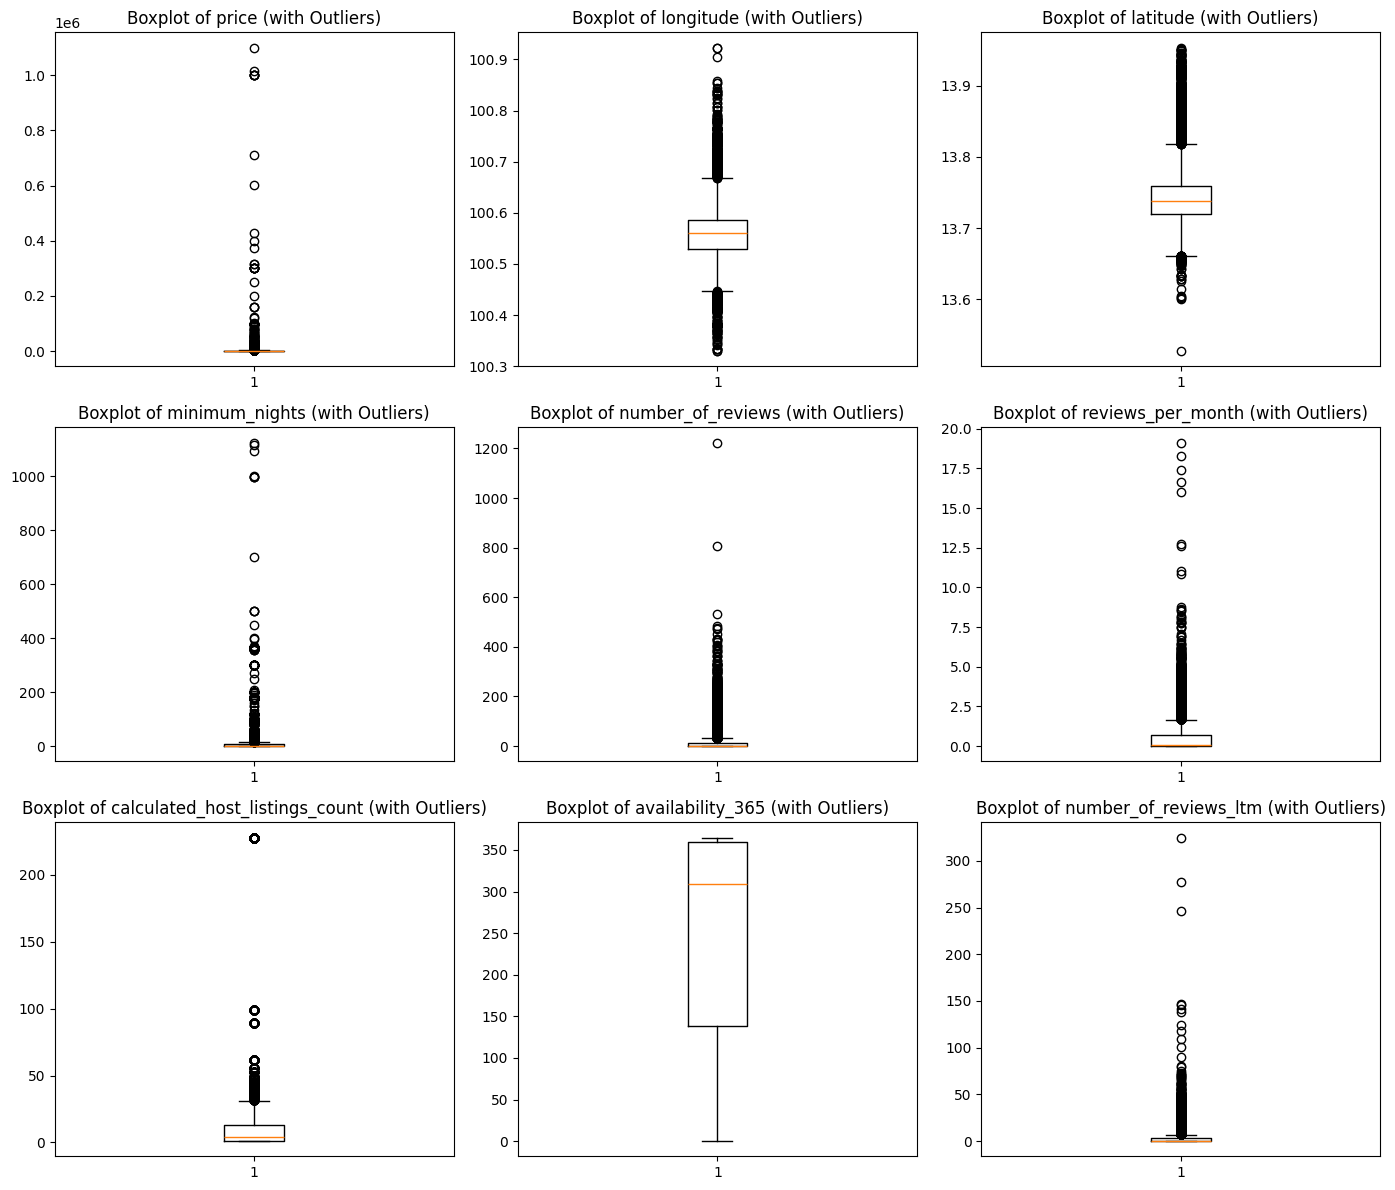

In [18]:
f, axes = plt.subplots(3, 3, figsize = (14,12))
axes = axes.flatten()
for i, column in enumerate(df_numerikal) :
    axes[i].set_title(f"Boxplot of {column} (with Outliers)")
    axes[i].boxplot((df_numerikal[column].dropna()))

# Hide empty subplots
for j in range(i + 1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
# Iterasi untuk setiap kolom numerik
data_outlier = []
for col in df_numerikal.columns:
    q1 = df_numerikal[col].quantile(q=0.25)
    median = df_numerikal[col].median()
    q3 = df_numerikal[col].quantile(q=0.75)
    iqr = q3 - q1
    min_data = q1 - 1.5 * iqr
    max_data = q3 + 1.5 * iqr
    outliers = df_numerikal[(df_numerikal[col] < min_data) | (df_numerikal[col] > max_data)]
    num_outliers = len(outliers)
    data_outlier.append([col, min_data, q1, median, q3, max_data, iqr, num_outliers])


df_outlier = pd.DataFrame(data_outlier, columns=['Nama Kolom', 'Min Data', 'Q1', 'Q2/Median', 'Q3', 'Max Data', 'IQR', 'Jumlah Outliers'])
df_outlier.sort_values('Jumlah Outliers', ascending=False).reset_index(drop=True)

,Nama Kolom,Min Data,Q1,Q2/Median,Q3,Max Data,IQR,Jumlah Outliers
0,minimum_nights,-8.000000,1.00000,1.00000,7.00000,16.000000,6.00000,3168
1,number_of_reviews,-19.500000,0.00000,2.00000,13.00000,32.500000,13.00000,2240
2,number_of_reviews_ltm,-4.500000,0.00000,0.00000,3.00000,7.500000,3.00000,2219
3,calculated_host_listings_count,-17.000000,1.00000,4.00000,13.00000,31.000000,12.00000,1832
4,reviews_per_month,-1.005000,0.00000,0.09000,0.67000,1.675000,0.67000,1471
5,price,-1393.500000,900.00000,1429.00000,2429.00000,4722.500000,1529.00000,1403
6,latitude,13.660975,13.72009,13.73849,13.75950,13.818615,0.03941,1094
7,longitude,100.446500,100.52969,100.56141,100.58515,100.668340,0.05546,602
8,availability_365,-195.000000,138.00000,309.00000,360.00000,693.000000,222.00000,0


Dari hasil pemeriksaan outlier, analisis outlier mengungkapkan variansi yang signifikan di beberapa kolom. Jumlah outlier paling tinggi ditemukan pada kolom 'minimum_nights' dengan total 3.168 yang diikuti oleh kolom 'number_of_reviews' dengan 2.240, menunjukkan perbedaan signifikan dalam perilaku host dan pemesanan. Selain itu, kolom penting lainnya khususnya kolom 'price' memiliki 1.403 outlier, yang menunjukkan variabilitas harga yang besar. 

<h3> Handle Outlier

In [20]:
price_review = ['price', 'number_of_reviews']
df_clean = df.copy()
for col in price_review :
    q1_data = df[col].quantile(q=0.25)
    q3_data = df[col].quantile(q=0.75)
    interquantile_range = q3_data-q1_data

    min_data = q1_data-(1.5*interquantile_range)
    max_data = q3_data+(1.5*interquantile_range)

    df_clean = df_clean[(df_clean[col] <= max_data) & (df_clean[col] >= min_data)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12370 entries, 1 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              12370 non-null  int64         
 1   name                            12370 non-null  object        
 2   host_id                         12370 non-null  int64         
 3   host_name                       12370 non-null  object        
 4   neighbourhood                   12370 non-null  object        
 5   latitude                        12370 non-null  float64       
 6   longitude                       12370 non-null  float64       
 7   room_type                       12370 non-null  object        
 8   price                           12370 non-null  int64         
 9   minimum_nights                  12370 non-null  int64         
 10  number_of_reviews               12370 non-null  int64         
 11  last_re

Dalam kasus ini, Outlier yang akan dibuang dari data hanyalah outlier yang ada pada kolom 'price' dan 'number_of_reviews'. Hal ini dikarenakan kedua kolom itu nantinya akan digunakan untuk keperluan uji statistik, sedangkan kolom lainnya akan dibiarkan guna keperluan analisa secara menyeluruh.

<h3> Check Normalitas Kolom

In [21]:
df_numerikal_clean = df_clean[['price','longitude', 'latitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

In [22]:
df_numerikal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12370 entries, 1 to 15853
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           12370 non-null  int64  
 1   longitude                       12370 non-null  float64
 2   latitude                        12370 non-null  float64
 3   minimum_nights                  12370 non-null  int64  
 4   number_of_reviews               12370 non-null  int64  
 5   reviews_per_month               12370 non-null  float64
 6   calculated_host_listings_count  12370 non-null  int64  
 7   availability_365                12370 non-null  int64  
 8   number_of_reviews_ltm           12370 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 966.4 KB


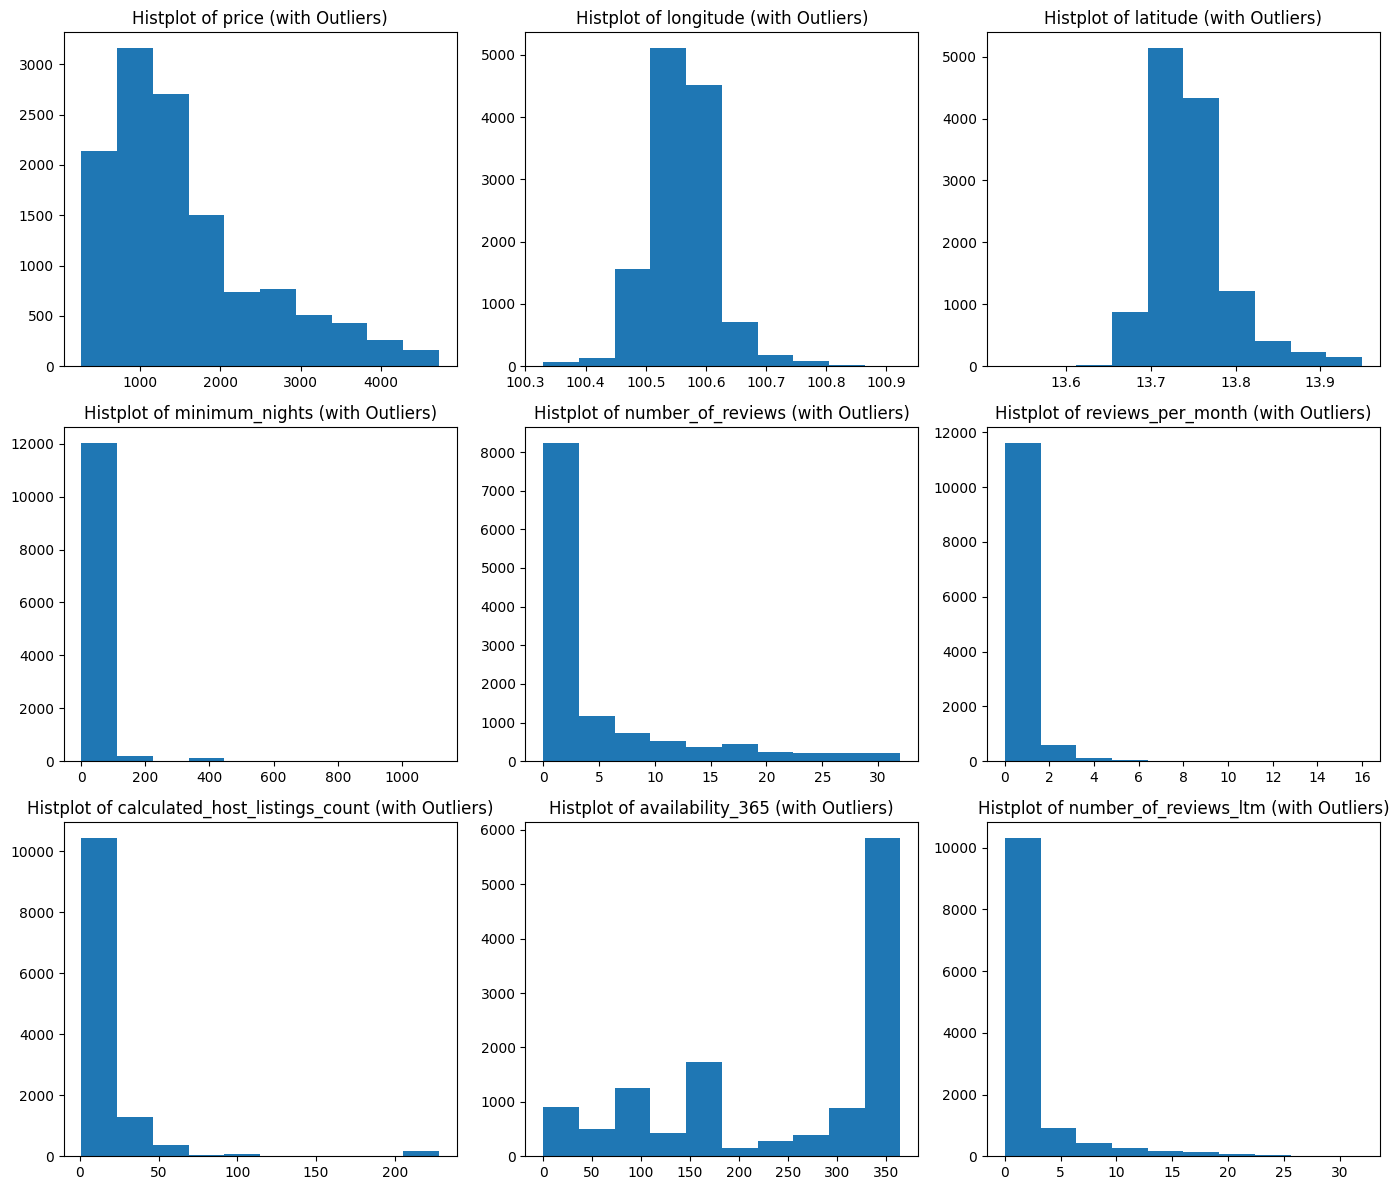

In [23]:
f, axes = plt.subplots(3, 3, figsize = (14,12))
axes = axes.flatten()
for i, column in enumerate(df_numerikal_clean) :
    axes[i].set_title(f"Histplot of {column} (with Outliers)")
    axes[i].hist((df_numerikal_clean[column]))

# Hide empty subplots
for j in range(i + 1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [24]:
# Melakukan uji normaltest

dist_normal_results = []
for col in df_numerikal_clean.columns:
    stat, p = normaltest(df_numerikal_clean[col])
    normal = "Berdistribusi normal" if p > 0.05 else "Tidak Berdistribusi normal"  # Ambil alpha = 0.05 sebagai batas signifikansi
    dist_normal_results.append([col, stat, p, normal])


dist_normal_df = pd.DataFrame(dist_normal_results, columns=['Kolom', 'Test Statistic', 'p-value', 'Asumsi'])
dist_normal_df

,Kolom,Test Statistic,p-value,Asumsi
0,price,1912.652054,0.000000e+00,Tidak Berdistribusi normal
1,longitude,1412.155591,2.261047e-307,Tidak Berdistribusi normal
2,latitude,3123.793612,0.000000e+00,Tidak Berdistribusi normal
3,minimum_nights,16504.311566,0.000000e+00,Tidak Berdistribusi normal
4,number_of_reviews,4282.145783,0.000000e+00,Tidak Berdistribusi normal
5,reviews_per_month,12392.903712,0.000000e+00,Tidak Berdistribusi normal
6,calculated_host_listings_count,12992.596440,0.000000e+00,Tidak Berdistribusi normal
7,availability_365,7118.155868,0.000000e+00,Tidak Berdistribusi normal
8,number_of_reviews_ltm,8608.061755,0.000000e+00,Tidak Berdistribusi normal


Jika dilihat berdasarkan plot histogram, Tidak ada satupun kolom yang membentuk plot layaknya plot distribusi normal. Hal ini dibuktikan dengan uji normalitas menggunakan D'Agostino-Pearson pada setiap kolom numerikal dimana setiap kolom menunjukkan hasil Tidak berdistribusi normal.

<h3> Percobaan untuk mencapai distribusi normal

In [25]:
data_outlier = []
for col in df_numerikal_clean.columns:
    q1 = df_numerikal_clean[col].quantile(q=0.25)
    median = df_numerikal_clean[col].median()
    q3 = df_numerikal_clean[col].quantile(q=0.75)
    iqr = q3 - q1
    min_data = q1 - 1.5 * iqr
    max_data = q3 + 1.5 * iqr
    outliers = df_numerikal_clean[(df_numerikal_clean[col] < min_data) | (df_numerikal_clean[col] > max_data)]
    num_outliers = len(outliers)
    data_outlier.append([col, min_data, q1, median, q3, max_data, iqr, num_outliers])


df_outlier = pd.DataFrame(data_outlier, columns=['Nama Kolom', 'Min Data', 'Q1', 'Q2/Median', 'Q3', 'Max Data', 'IQR', 'Jumlah Outliers'])
df_outlier.sort_values('Jumlah Outliers', ascending=False).reset_index(drop=True)

,Nama Kolom,Min Data,Q1,Q2/Median,Q3,Max Data,IQR,Jumlah Outliers
0,minimum_nights,-12.500000,1.000000,1.000000,10.00000,23.500000,9.000000,2466
1,reviews_per_month,-0.510000,0.000000,0.040000,0.34000,0.850000,0.340000,1545
2,calculated_host_listings_count,-15.500000,1.000000,4.000000,12.00000,28.500000,11.000000,1512
3,number_of_reviews_ltm,-3.000000,0.000000,0.000000,2.00000,5.000000,2.000000,1390
4,number_of_reviews,-9.000000,0.000000,1.000000,6.00000,15.000000,6.000000,1335
5,latitude,13.654166,13.718543,13.739295,13.76146,13.825836,0.042917,754
6,price,-875.000000,850.000000,1299.000000,2000.00000,3725.000000,1150.000000,479
7,longitude,100.438295,100.528130,100.562895,100.58802,100.677855,0.059890,479
8,availability_365,-178.000000,146.000000,319.000000,362.00000,686.000000,216.000000,0


- Sisa outlier kolom price adalah 479
- Sisa outlier kolom number_of_reviews adalah 1335

In [26]:
price_review = ['price', 'number_of_reviews']
df_clean2 = df_clean.copy()
for col in price_review :
    q1_data = df_clean2[col].quantile(q=0.25)
    q3_data = df_clean2[col].quantile(q=0.75)
    interquantile_range = q3_data-q1_data

    min_data = q1_data-(1.5*interquantile_range)
    max_data = q3_data+(1.5*interquantile_range)

    df_clean2 = df_clean2[(df_clean2[col] <= max_data) & (df_clean2[col] >= min_data)]
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10613 entries, 1 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10613 non-null  int64         
 1   name                            10613 non-null  object        
 2   host_id                         10613 non-null  int64         
 3   host_name                       10613 non-null  object        
 4   neighbourhood                   10613 non-null  object        
 5   latitude                        10613 non-null  float64       
 6   longitude                       10613 non-null  float64       
 7   room_type                       10613 non-null  object        
 8   price                           10613 non-null  int64         
 9   minimum_nights                  10613 non-null  int64         
 10  number_of_reviews               10613 non-null  int64         
 11  last_re

Sisa data mencapai 10613 dari total 15854 data

In [27]:
df_numerikal_clean2 = df_clean2[['price','longitude', 'latitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

In [28]:
# Melakukan uji normaltest

dist_normal_results = []
for col in df_numerikal_clean2.columns:
    stat, p = normaltest(df_numerikal_clean2[col])
    normal = "Berdistribusi normal" if p > 0.05 else "Tidak Berdistribusi normal"  # Ambil alpha = 0.05 sebagai batas signifikansi
    dist_normal_results.append([col, stat, p, normal])


dist_normal_df = pd.DataFrame(dist_normal_results, columns=['Kolom', 'Test Statistic', 'p-value', 'Asumsi'])
dist_normal_df

,Kolom,Test Statistic,p-value,Asumsi
0,price,1097.733659,4.267412e-239,Tidak Berdistribusi normal
1,longitude,1060.621700,4.885671e-231,Tidak Berdistribusi normal
2,latitude,2537.149583,0.000000e+00,Tidak Berdistribusi normal
3,minimum_nights,14096.254717,0.000000e+00,Tidak Berdistribusi normal
4,number_of_reviews,2978.999349,0.000000e+00,Tidak Berdistribusi normal
5,reviews_per_month,9656.928222,0.000000e+00,Tidak Berdistribusi normal
6,calculated_host_listings_count,11677.914587,0.000000e+00,Tidak Berdistribusi normal
7,availability_365,4582.957600,0.000000e+00,Tidak Berdistribusi normal
8,number_of_reviews_ltm,6210.516716,0.000000e+00,Tidak Berdistribusi normal


Setelah melewati 2x proses cleaning outlier pada kolom price dan number_of_review, ternyata kolom price dan number_of_review masih belum terdistribusi normal setelah di uji menggunakan D'Agostino-Pearson  

- Perlu Ditekankan bahwa untuk kebutuhan analisa pada data Airbnb Listing Bangkok ini akan tetap menggunakan dataframe awal sebelum dilakukannya cleaning outlier. Hal ini dikarenakan analisa Airbnb Listing mencermikan realitas pasar sehingga nilai-nilai outlier yang dimiliki oleh data ini akan tetap digunakan untuk memberikan wawasan tentang variasi pasar dan segmen yang berbeda
- Dari percobaan untuk mencapai distribusi normal pada kolom price dan number_of_review, didapat kedua kolom tersebut setelah melewati 2x proses cleaning belum mencapai distribusi normal dimana data sudah berkurang hingga 10613, 33% data dibuang dari total 15854
- Proses analisa akan menggunakan non-parametrik seperti median, kruskal-wallis yang dengan adanya outlier tidak akan memengaruhi uji statistik secara signifikan dan juga chi-square .

<h2>Data Analysis

<h3>Correlation

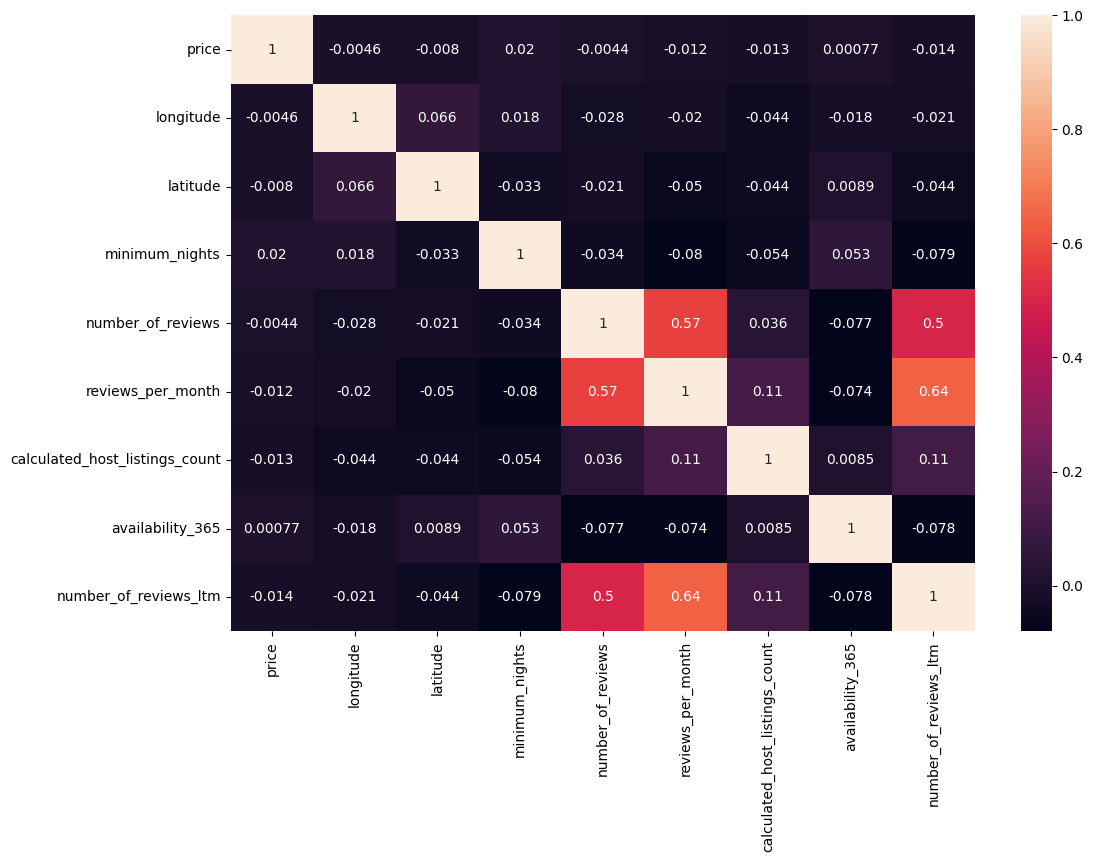

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df_numerikal.corr(),annot = True)
plt.show()

Dari hasil korelasi antar kolom numerikal, dapat dilihat bahwa korelasi yang memiliki nilai tinggi hanyalah kolom sesama review, seperti number_of_reviews dengan reviews_per_month dan reviews_per_month dengan number_of_review_ltm. Tidak ada korelasi yang signifikan antara kolom-kolom penting lainnya. Maka dari itu, tidak terdapat insight lebih lanjut yang dapat diambil dari hasil korelasi ini.

<h3>Neighbourhood Analysis

In [30]:
df['neighbourhood'].nunique()

50

In [31]:
df['neighbourhood'].unique()

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

Dari data, ternyata layanan Airbnb sudah mencakupi semua distrik atau neighbourhood di kota Bangkok, dimana menurut [Wikipedia](https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok) kota Bangkok memilki 50 distrik

C:\Users\Legion\AppData\Local\Temp\ipykernel_8880\1939589521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_neighborhoods.values, y=count_neighborhoods.index, palette="viridis")


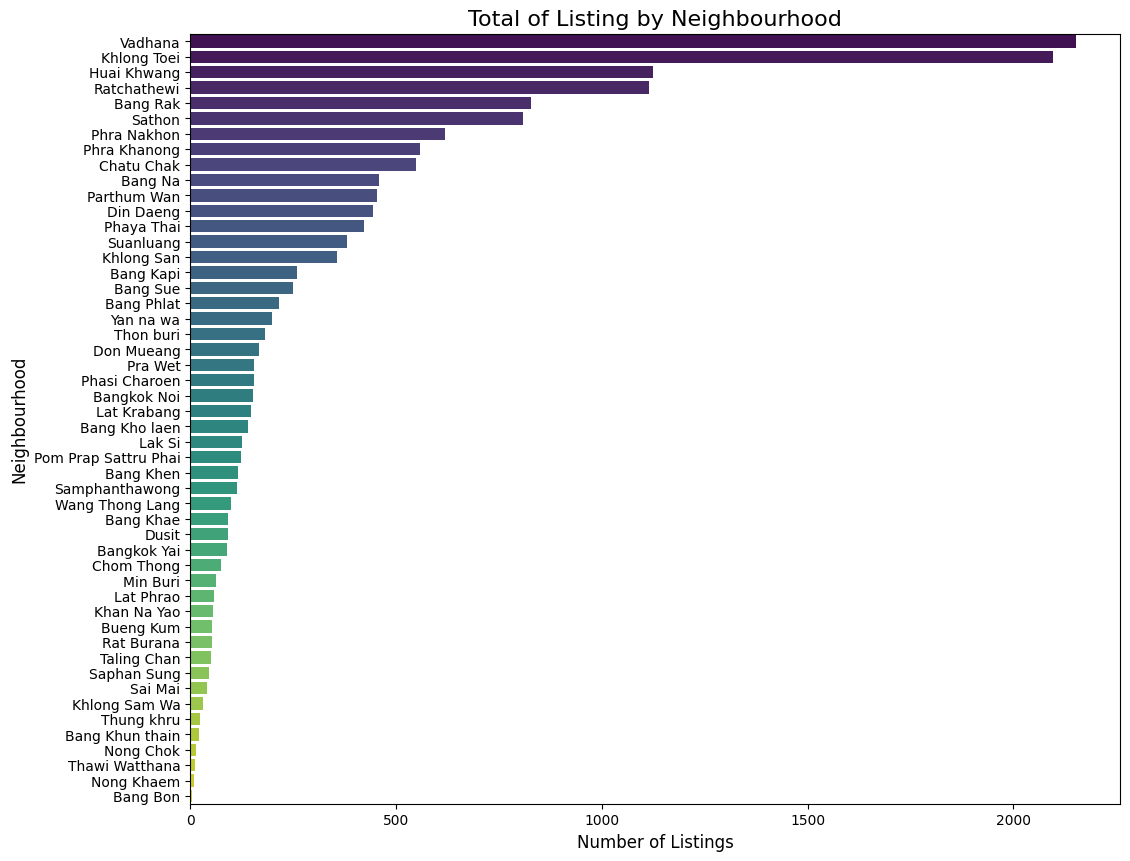

In [32]:
# 2. Neighborhood Popularity: Number of listings per neighborhood
count_neighborhoods = df['neighbourhood'].value_counts()
plt.figure(figsize=(12, 10))
sns.barplot(x=count_neighborhoods.values, y=count_neighborhoods.index, palette="viridis")
plt.title("Total of Listing by Neighbourhood", fontsize=16)
plt.xlabel("Number of Listings", fontsize=12)
plt.ylabel("Neighbourhood", fontsize=12)
plt.show()

Dari 50 distrik kota Bangkok, distrik Vadhana menjadi distrik yang mempunyai paling banyak layanan Airbnb, yaitu sebanyak 2153 layanan dan diikuti oleh distrik Khlong Toei sebanyak 2097 layanan. Sedangkan distrik Bang Bon menjadi yang paling sedikit dengan hanya 5 layanan Airbnb

In [33]:
neighbourhood_location = df.groupby("neighbourhood").agg(
    latitude=("latitude", "median"),
    longitude=("longitude", "median"),
    id=("id", "count"),
).reset_index()
neighbourhood_location


,neighbourhood,latitude,longitude,id
0,Bang Bon,13.651740,100.370970,5
1,Bang Kapi,13.760405,100.636444,260
2,Bang Khae,13.709570,100.395975,92
3,Bang Khen,13.872670,100.607920,116
4,Bang Kho laen,13.700640,100.513735,140
5,Bang Khun thain,13.657020,100.441110,21
6,Bang Na,13.672310,100.610155,458
7,Bang Phlat,13.790540,100.502600,217
8,Bang Rak,13.725730,100.525330,827
9,Bang Sue,13.818925,100.530500,250


In [34]:
bangkok = folium.Map(
    location=[13.736717, 100.523186],
    zoom_start=11,
    tiles="cartodb positron"
)

folium.GeoJson("bangkok.geojson", name='Bangkok').add_to(bangkok)

for i in neighbourhood_location.iterrows() :
    lat, long = i[1][['latitude', 'longitude']]
    folium.CircleMarker(
        location=[lat, long],
        radius=5,
        tooltip=f"{i[1]['neighbourhood']}\n{i[1]['id']}",
    ).add_to(bangkok)

bangkok

Jika dilihat secara geografis, distrik seperti Vadhana dan Khlong Toei Ternyata cukup berada di titik tengah kota Bangkok. Dan menurut [Wikipedia](https://en.wikipedia.org/wiki/Watthana_district), distrik Vadhana merupakan salah satu distrik komersil di kota Bangkok

Room type analysis

In [35]:
room_type_counts = df['room_type'].value_counts().reset_index()
room_type_counts

,room_type,count
0,Entire home/apt,8912
1,Private room,5770
2,Hotel room,648
3,Shared room,523


C:\Users\Legion\AppData\Local\Temp\ipykernel_8880\2806680259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts['room_type'], y=room_type_counts['count'], palette="coolwarm")


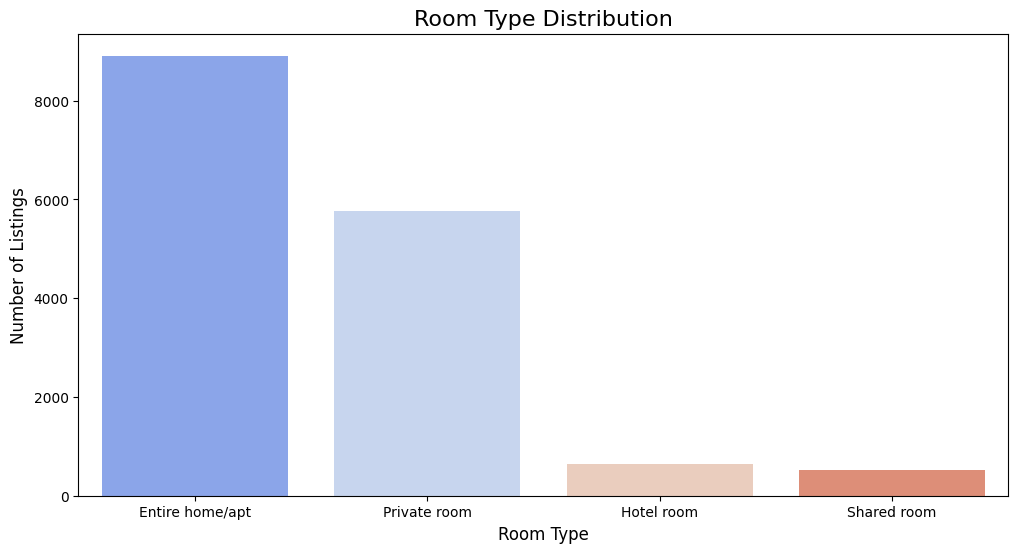

In [36]:
# Plot room type distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=room_type_counts['room_type'], y=room_type_counts['count'], palette="coolwarm")
plt.title("Room Type Distribution", fontsize=16)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.show()

Berdasarkan tipe ruangan
- Tipe Entire home/apt menjadi tipe hunian yang paling banyak tersedia yaitu sebanyak 8912 hunian dan diikuti tipe Private room sebanyak 5770.
- Sedangkan tipe Hotel room dan Shared room hanya berkisar di 648 hunian dan 523 hunian, sangat jauh dari Tipe Entire home/apt dan Private room

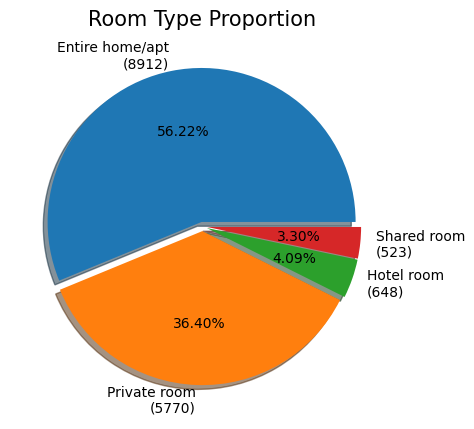

In [37]:
plt.figure(figsize=(16,5))
plt.pie(
    x = room_type_counts['count'],
    labels=[f"{room_type}\n({count})" for room_type, count in zip(room_type_counts['room_type'], room_type_counts['count'])],
    autopct="%.2f%%",
    explode=[0.03, 0.03, 0.03, 0.03],
    shadow=bool
)
plt.title("Room Type Proportion", size=15)
plt.show()

Secara proporsi dari hasil pie chart, tipe Entire home/apt mencapai 56.22%, melebihi setengah dari total hunian 

In [38]:
room_type_neighbourhood = pd.crosstab(index=df['neighbourhood'], columns=df['room_type'], values=df['id'], aggfunc='count')
room_type_neighbourhood['Total'] = room_type_neighbourhood.sum(axis=1)
room_type_neighbourhood = room_type_neighbourhood.sort_values('Total', ascending=False)
room_type_neighbourhood

room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Vadhana,1451.0,104.0,544.0,53.0,2152.0
Khlong Toei,1520.0,73.0,489.0,15.0,2097.0
Huai Khwang,776.0,25.0,301.0,23.0,1125.0
Ratchathewi,656.0,70.0,327.0,61.0,1114.0
Bang Rak,351.0,67.0,375.0,34.0,827.0
Sathon,557.0,15.0,220.0,17.0,809.0
Phra Nakhon,56.0,77.0,355.0,131.0,619.0
Phra Khanong,336.0,9.0,201.0,12.0,558.0
Chatu Chak,273.0,2.0,266.0,7.0,548.0


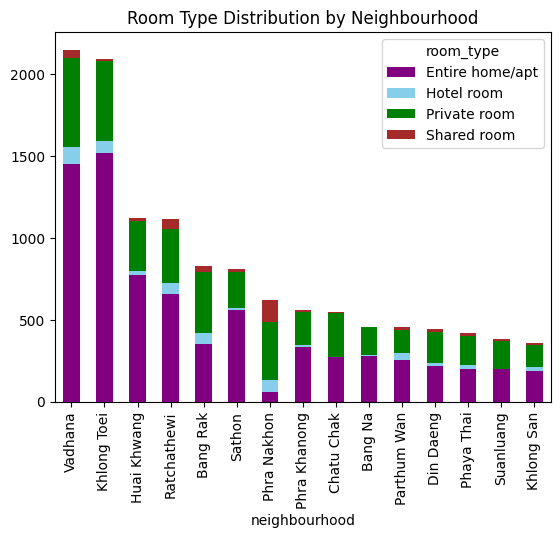

In [39]:
room_type_neighbourhood.drop('Total',axis=1).head(15).plot(kind='bar', stacked=True, color=['purple', 'skyblue', 'green', 'brown'])
plt.title("Room Type Distribution by Neighbourhood")
plt.show()

Seperti pada insight sebelumnya, tipe Entire home/apt mendominasi pasar dan terlihat dari tiap distrik sebagian besar tipe Entire home/apt melebihi tipe-tipe ruangan lainnya. 

Price Analysis

In [40]:
df[['name', 'neighbourhood', 'price']].sort_values(by='price', ascending=False).head(10)

,name,neighbourhood,price
12868,New 1 bedroom apartment BTS MRT Asoke,Vadhana,1100000
12300,3B中文No Guest Service Fee@Nana Asok/Soi11 Night...,Vadhana,1014758
6289,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,Khlong Toei,1000000
1779,"2 Bedroom,wifi,5mMRT&Shopping Mall",Huai Khwang,1000000
4620,"Modern&Luxury apartment,5min to MRT,freeWifi",Huai Khwang,1000000
9345,1BR cozy condo close to ONNUT BTS.,Khlong Toei,1000000
1239,"Modern,wifi,5m MRT&2 Shopping Mall",Huai Khwang,1000000
15200,80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫,Khlong San,710760
4373,rm 1 : cozy & comfy,Bang Phlat,600700
11885,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,Bang Kapi,429443


Hunian-hunian yang memiliki harga tinggi sampai melebihi 1000000 Baht tersebar di 3 distrik, yaitu Vadhana, Khlong Toei, dan Huai Khwang. Besarnya harga hunian mungkin dipengaruhi oleh keberadaan distrik yang cukup dekat dengan titik tengah kota Bangkok

In [41]:
df.groupby('neighbourhood')['price'].median().reset_index().sort_values(by='price', ascending=False)

,neighbourhood,price
27,Nong Chok,2539.0
29,Parthum Wan,2400.0
47,Vadhana,2000.0
39,Samphanthawong,2000.0
8,Bang Rak,1850.0
34,Pom Prap Sattru Phai,1709.0
22,Khlong Toei,1700.0
37,Ratchathewi,1536.0
43,Taling Chan,1502.5
25,Lat Phrao,1500.0


Harga hunian tertinggi terdapat di distrik Nong Chok dengan nilai median 2539 Baht

Uji Rata-Rata Perbedaan Harga di 10 Distrik listing Terbanyak

In [42]:
# Filter 10 neighborhood dengan jumlah listing terbanyak
top_10_neighborhoods = df['neighbourhood'].value_counts().head(10).index
df_top_10 = df[df['neighbourhood'].isin(top_10_neighborhoods)]

# Memisahkan harga berdasarkan masing-masing neighborhood
groups = [df_top_10[df_top_10['neighbourhood'] == neighborhood]['price'] 
          for neighborhood in top_10_neighborhoods]

# Uji Kruskal-Wallis
stat, p_value = kruskal(*groups)
print(f"Hasil Kruskal-Wallis: Statistik = {stat}, p-value = {p_value}")

# Kesimpulan
if p_value < 0.05:
    print("H₀ ditolak: Terdapat perbedaan signifikan median harga di antara 10 neighborhood teratas.")
else:
    print("H₀ gagal ditolak: Tidak ada perbedaan signifikan median harga di antara 10 neighborhood teratas.")

# Dunn's Test
posthoc = sp.posthoc_dunn(df_top_10, val_col='price', group_col='neighbourhood', p_adjust='bonferroni')
posthoc


Hasil Kruskal-Wallis: Statistik = 931.6793982446692, p-value = 9.222335883188276e-195
H₀ ditolak: Terdapat perbedaan signifikan median harga di antara 10 neighborhood teratas.


,Bang Na,Bang Rak,Chatu Chak,Huai Khwang,Khlong Toei,Phra Khanong,Phra Nakhon,Ratchathewi,Sathon,Vadhana
Bang Na,1.000000e+00,1.209930e-34,1.000000e+00,1.125263e-08,4.320501e-36,1.000000e+00,1.000000e+00,9.697092e-24,1.194348e-07,1.137475e-64
Bang Rak,1.209930e-34,1.000000e+00,4.363248e-29,3.291309e-15,1.000000e+00,1.213792e-44,1.025032e-29,3.359824e-02,3.245047e-13,8.735997e-03
Chatu Chak,1.000000e+00,4.363248e-29,1.000000e+00,5.473435e-05,2.651100e-30,6.320330e-01,1.000000e+00,1.582118e-18,2.764676e-04,3.456375e-59
Huai Khwang,1.125263e-08,3.291309e-15,5.473435e-05,1.000000e+00,1.518483e-15,4.643972e-13,9.711361e-05,3.384411e-06,1.000000e+00,3.537076e-46
Khlong Toei,4.320501e-36,1.000000e+00,2.651100e-30,1.518483e-15,1.000000e+00,6.926626e-49,1.666084e-31,1.000000e+00,1.394962e-12,1.682633e-11
Phra Khanong,1.000000e+00,1.213792e-44,6.320330e-01,4.643972e-13,6.926626e-49,1.000000e+00,2.304538e-01,4.427023e-32,2.173648e-11,1.344430e-84
Phra Nakhon,1.000000e+00,1.025032e-29,1.000000e+00,9.711361e-05,1.666084e-31,2.304538e-01,1.000000e+00,8.832663e-19,5.090610e-04,1.461827e-62
Ratchathewi,9.697092e-24,3.359824e-02,1.582118e-18,3.384411e-06,1.000000e+00,4.427023e-32,8.832663e-19,1.000000e+00,2.878674e-05,3.831770e-15
Sathon,1.194348e-07,3.245047e-13,2.764676e-04,1.000000e+00,1.394962e-12,2.173648e-11,5.090610e-04,2.878674e-05,1.000000e+00,3.892378e-37
Vadhana,1.137475e-64,8.735997e-03,3.456375e-59,3.537076e-46,1.682633e-11,1.344430e-84,1.461827e-62,3.831770e-15,3.892378e-37,1.000000e+00


In [43]:
posthoc<0.05

,Bang Na,Bang Rak,Chatu Chak,Huai Khwang,Khlong Toei,Phra Khanong,Phra Nakhon,Ratchathewi,Sathon,Vadhana
Bang Na,False,True,False,True,True,False,False,True,True,True
Bang Rak,True,False,True,True,False,True,True,True,True,True
Chatu Chak,False,True,False,True,True,False,False,True,True,True
Huai Khwang,True,True,True,False,True,True,True,True,False,True
Khlong Toei,True,False,True,True,False,True,True,False,True,True
Phra Khanong,False,True,False,True,True,False,False,True,True,True
Phra Nakhon,False,True,False,True,True,False,False,True,True,True
Ratchathewi,True,True,True,True,False,True,True,False,True,True
Sathon,True,True,True,False,True,True,True,True,False,True
Vadhana,True,True,True,True,True,True,True,True,True,False


Dari hasil ini, terlihat bahwa variasi harga pada tiap distrik di kota Bangkok cukup besar dengan banyaknya nilai True pada hasil dunn test. 
- Pada distrik Huai Khwang yang memiliki banyak nilai True antar distriknya, dapat disimpulkan bahwa harga di daerah tersebut secara signifikan berbeda dari banyak daerah lainnya.
- Sama halnya dengan distrik Sathon, perbedaan harga di distrik Sathon dengan distrik lainnya cukup signifikan.

Uji Pengaruh Letak Geografis Terhadap Harga di Distrik-distrik

In [ ]:
neighbourhood_location_price = df.groupby('neighbourhood')[['latitude', 'longitude', 'price']].median().reset_index()
neighbourhood_location_price

,neighbourhood,latitude,longitude,price
0,Bang Bon,13.651740,100.370970,1200.0
1,Bang Kapi,13.760405,100.636444,932.0
2,Bang Khae,13.709570,100.395975,911.0
3,Bang Khen,13.872670,100.607920,882.0
4,Bang Kho laen,13.700640,100.513735,1265.0
5,Bang Khun thain,13.657020,100.441110,1000.0
6,Bang Na,13.672310,100.610155,1000.0
7,Bang Phlat,13.790540,100.502600,900.0
8,Bang Rak,13.725730,100.525330,1850.0
9,Bang Sue,13.818925,100.530500,900.0


In [45]:
from scipy.stats import spearmanr
from geopy.distance import geodesic

# Define city center coordinates
city_center = (13.7563, 100.5018)

# Calculate distances
neighbourhood_location_price['distance_from_center'] = neighbourhood_location_price.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), city_center).km, axis=1)

# Correlation test
corr, p = spearmanr(neighbourhood_location_price['distance_from_center'], neighbourhood_location_price['price'])
print(f"Hasil Spearman Correlation: {corr}, p-value: {p}")

# Kesimpulan
if p_value < 0.05:
    print("H₀ ditolak: Terdapat hubungan antara median harga dengan jarak dari pusat kota Bangkok.")
else:
    print("H₀ gagal ditolak: Tidak ada hubungan antara median harga dengan jarak dari pusat kota Bangkok.")

Hasil Spearman Correlation: -0.4012012735620864, p-value: 0.003882460806013758
H₀ ditolak: Terdapat hubungan antara median harga dengan jarak dari pusat kota Bangkok.


- Hasil p-value menunjukkan adanya hubungan antara median harga dengan jarak dari pusat kota Bangkok.
- Hasil Korelasi menunjukkan nilai negatif yang berarti median harga kemungkinan menurun seiring bertambahnya jarak dari pusat kota. Namun, tingkat korelasinya cukup rendah dimana hanya berkisar 0.4 saja

Uji Rata-rata Perbedaan Harga pada Tiap Ruangan

In [46]:
# Group prices by room type
groups = [df[df['room_type'] == rt]['price'] for rt in df['room_type'].unique()]

# Kruskal-Wallis test
stat, p = kruskal(*groups)
print(f"Hasil Kruskal-Wallis Statistic: {stat}, p-value: {p}")

# Kesimpulan
if p_value < 0.05:
    print("H₀ ditolak: Terdapat perbedaan signifikan median harga di antara tipe ruangan.")
else:
    print("H₀ gagal ditolak: Tidak ada perbedaan signifikan median harga di antara tipe ruangan.")

Hasil Kruskal-Wallis Statistic: 1190.0452264176506, p-value: 1.05937263695462e-257
H₀ ditolak: Terdapat perbedaan signifikan median harga di antara tipe ruangan.


In [ ]:
# Dunn's Test
posthoc = sp.posthoc_dunn(df_clean, val_col='price', group_col='room_type', p_adjust='bonferroni')
posthoc

,Entire home/apt,Hotel room,Private room,Shared room
Entire home/apt,1.000000e+00,1.000000e+00,3.020290e-63,3.073304e-212
Hotel room,1.000000e+00,1.000000e+00,5.580290e-07,1.510719e-103
Private room,3.020290e-63,5.580290e-07,1.000000e+00,2.037879e-127
Shared room,3.073304e-212,1.510719e-103,2.037879e-127,1.000000e+00


In [48]:
posthoc < 0.05

,Entire home/apt,Hotel room,Private room,Shared room
Entire home/apt,False,False,True,True
Hotel room,False,False,True,True
Private room,True,True,False,True
Shared room,True,True,True,False


Jika dilihat berdasar hasil dunn test, median harga tipe Shared room berbeda secara signifikan dengan semua tipe ruangan. Median harga Hotel room ternyata relatif stabil dengan median harga Entire home/apt, padahal tipe Private room dan Shared room berbeda signifikan dengan tipe Entire home/apt.

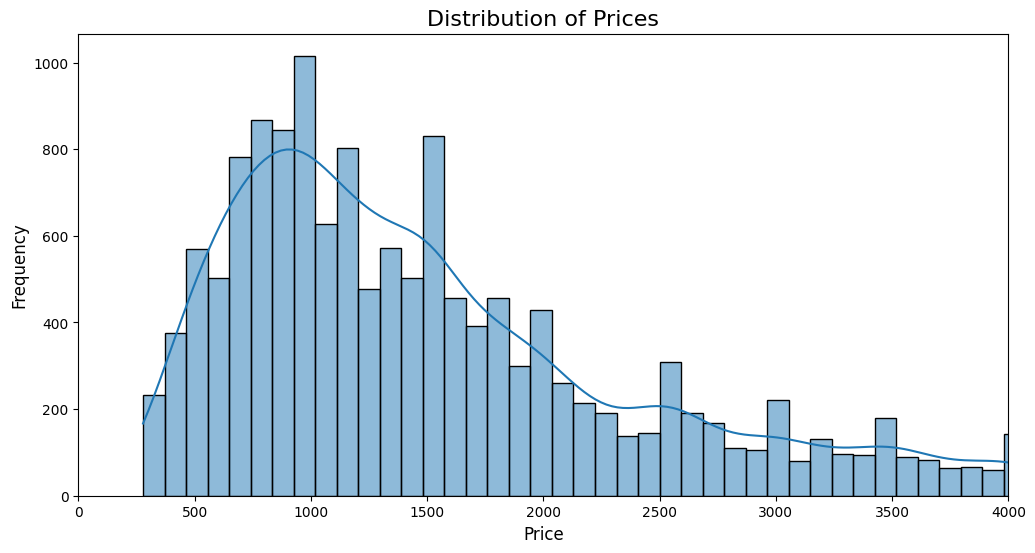

In [49]:
# 1. Pricing Trends: Distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(df[df['price'] < 5000], x = 'price', kde=True)
plt.title("Distribution of Prices", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, 4000)  # Limit x-axis for better visibility of common prices
plt.show()

Hasil Distribusi data pada kolom price menunjukkan sebagian besar hunian yang di-listing memiliki harga di bawah 4.000 Baht, dan kebanyakkan berada di sekitar 9000-2.000 Baht. Namun, terdapat juga beberapa listing kelas atas dengan harga lebih tinggi, yang menunjukkan keberagaman harga tiap hunian.

REVIEW ANALYSIS

In [50]:
df_reviewperyear = df.groupby(df['last_review'].dt.year)['number_of_reviews'].sum().reset_index()
df_reviewperyear

,last_review,number_of_reviews
0,2012.0,4
1,2013.0,30
2,2014.0,16
3,2015.0,182
4,2016.0,852
5,2017.0,1407
6,2018.0,3978
7,2019.0,10616
8,2020.0,31423
9,2021.0,4199


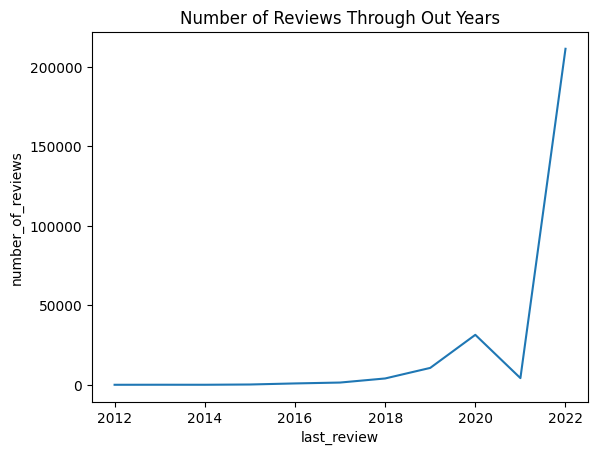

In [51]:
sns.lineplot(
    data = df_reviewperyear,
    x = df_reviewperyear['last_review'],
    y = df_reviewperyear['number_of_reviews'],
)
plt.title("Number of Reviews Through Out Years")
plt.show()

Jumlah review dari tahun ke tahun menunjukkan kenaikan yang signifikan terutama pada tahun 2020 dan puncaknya di tahun 2022.

In [52]:
district_review = df.groupby(df['neighbourhood'])['number_of_reviews'].sum().reset_index()
district_review.sort_values('number_of_reviews', ascending=False)

,neighbourhood,number_of_reviews
22,Khlong Toei,41281
47,Vadhana,37415
41,Sathon,22242
37,Ratchathewi,20698
18,Huai Khwang,18145
8,Bang Rak,17654
31,Phaya Thai,13659
29,Parthum Wan,9103
13,Chatu Chak,8218
33,Phra Nakhon,8142


Jumlah review paling banyak terdapat di distrik Khlong Toei dengan total 41281 review. 

In [ ]:
review_neighbourhood = pd.crosstab(index=df['neighbourhood'], columns=df['room_type'], values=df['number_of_reviews'], aggfunc='sum')
review_neighbourhood['Total'] = review_neighbourhood.sum(axis=1)
review_neighbourhood = review_neighbourhood.sort_values('Total', ascending=False)
review_neighbourhood

room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Khlong Toei,34377.0,4249.0,2629.0,26.0,41281.0
Vadhana,32536.0,1042.0,3381.0,456.0,37415.0
Sathon,19566.0,329.0,2173.0,174.0,22242.0
Ratchathewi,13998.0,2168.0,3996.0,536.0,20698.0
Huai Khwang,14012.0,188.0,3940.0,5.0,18145.0
Bang Rak,13600.0,739.0,3069.0,246.0,17654.0
Phaya Thai,10003.0,614.0,2807.0,235.0,13659.0
Parthum Wan,7664.0,450.0,964.0,25.0,9103.0
Chatu Chak,5782.0,0.0,2434.0,2.0,8218.0


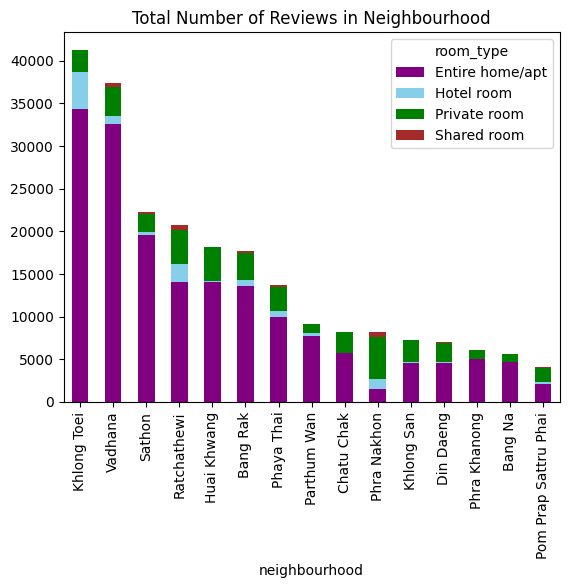

In [54]:
review_neighbourhood.drop('Total',axis=1).head(15).plot(kind='bar', stacked=True, color=['purple', 'skyblue', 'green', 'brown'])
plt.title("Total Number of Reviews in Neighbourhood")
plt.show()

Jika dipisah berdasarkan tipe ruangan dari tiap distrik, hampir semua distrik mempunyai jumlah review paling banyak dari tipe Entire home/apt

In [55]:
room_type_reviews = df.groupby('room_type')['number_of_reviews'].sum().reset_index()
room_type_reviews

,room_type,number_of_reviews
0,Entire home/apt,197943
1,Hotel room,12700
2,Private room,50710
3,Shared room,2682


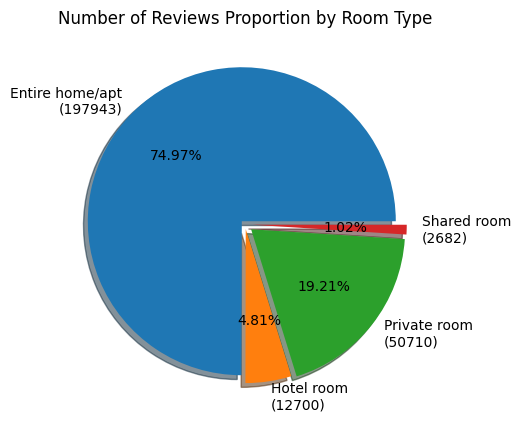

In [56]:
plt.figure(figsize=(16,5))
plt.pie(
    x = room_type_reviews['number_of_reviews'],
    labels=[f"{room_type}\n({count})" for room_type, count in zip(room_type_reviews['room_type'], room_type_reviews['number_of_reviews'])],
    autopct="%.2f%%",
    explode=[0.03, 0.03, 0.05, 0.05],
    shadow=bool
)
plt.title("Number of Reviews Proportion by Room Type")
plt.show()

Seperti sebelumnya, jumlah review paling banyak terdapat di tipe Entire home/apt dengan total 197943 dan proporsi yang sangat tinggi, yaitu 74.97% yang mana hampir 3/4 dari total jumlah review.

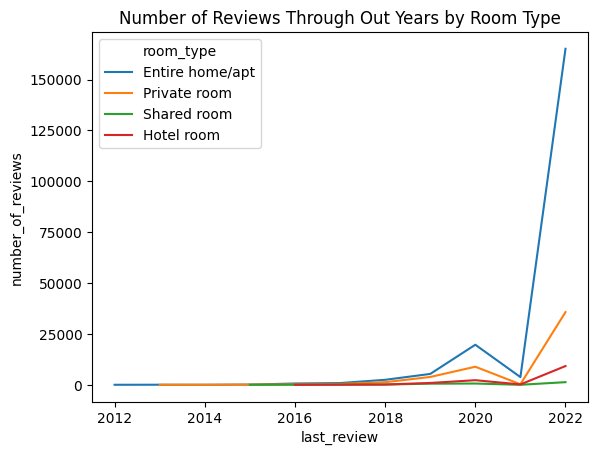

In [57]:
review_year_type = df.groupby([df['last_review'].dt.year, 'room_type'])['number_of_reviews'].sum().reset_index()
sns.lineplot(
    data = review_year_type,
    x = review_year_type['last_review'],
    y = review_year_type['number_of_reviews'],
    hue=review_year_type['room_type'],
)
plt.title("Number of Reviews Through Out Years by Room Type")
plt.show()

Sama dengan line chart diawal, jumlah review dari tiap tipe ruangan meningkat di tahun 2020 dan puncaknya di tahun 2022.

Uji Hubungan Jumlah Review dengan Neighbourhood

In [58]:
# Step 1: Create categories for 'number_of_reviews'
bins = [0, 10, 50, np.inf]  # Low: 0-10, Medium: 11-50, High: >50 reviews
labels = ['Low', 'Medium', 'High']
df['review_frequency'] = pd.cut(df['number_of_reviews'], bins=bins, labels=labels, right=False)

# Step 2: Create a contingency table between 'review_frequency' and 'neighbourhood'
contingency_table = pd.crosstab( df['neighbourhood'],df['review_frequency'])
contingency_table['Total'] = contingency_table.sum(axis=1)
contingency_table = contingency_table.sort_values('Total', ascending=False)


# Step 3: Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table.drop('Total', axis=1))

print(f"Hasil chisquare = {chi2_stat}, p-value = {p_value}")

# Kesimpulan
if p_value < 0.05:
    print("H₀ ditolak: Terdapat hubungan antara jumlah review dengan neighbourhood.")
else:
    print("H₀ gagal ditolak: Tidak ada hubungan antara jumlah review dengan neighbourhood.")


Hasil chisquare = 731.473240588514, p-value = 1.45103162128178e-97
H₀ ditolak: Terdapat hubungan antara jumlah review dengan neighbourhood.


Dengan hasil p-value < 0.05, dapat diartikan bahwa ada perbedaan yang signifikan dalam jumlah ulasan berdasarkan neighbourhood. Ini menunjukkan bahwa wilayah tertentu mungkin lebih menarik bagi wisatawan, atau ada perbedaan dalam tingkat hunian dan popularitas listing di berbagai wilayah

In [59]:
contingency_table

review_frequency,Low,Medium,High,Total
neighbourhood,,,,
Vadhana,1481,441,230,2152
Khlong Toei,1251,629,217,2097
Huai Khwang,804,216,105,1125
Ratchathewi,720,248,146,1114
Bang Rak,529,187,111,827
Sathon,510,180,119,809
Phra Nakhon,463,111,45,619
Phra Khanong,428,97,33,558
Chatu Chak,390,108,50,548


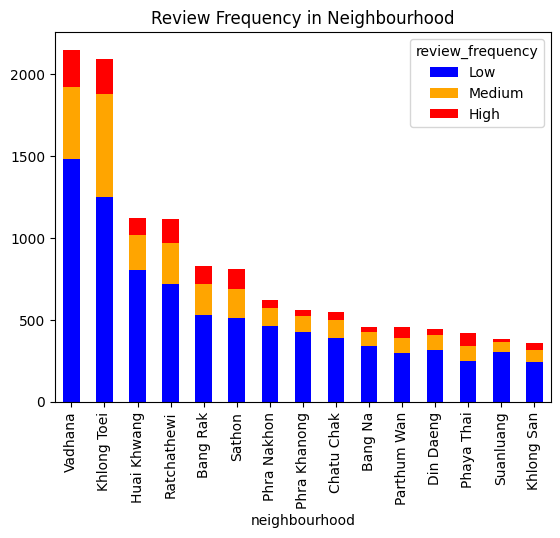

In [60]:
contingency_table.drop('Total', axis=1).head(15).plot(kind='bar', stacked=True, color=['blue', 'orange', 'red'])
plt.title("Review Frequency in Neighbourhood")
plt.show()

Hampir setiap distrik, hunian-hunian disana masih banyak yang tingkat reviewnya rendah. Namun, walaupun masih banyak yang rendah, tentu tetap lebih baik jika tidak ada review sama sekali. Karena banyaknya review akan meningkatkan kredibilitas hunian tersebut.

Hunian yang Tidak Dapat di Sewa

In [61]:
availability_0 = df[(df['availability_365']==0) & (df['last_review'].notnull())]
print(f"Jumlah Hunian yang tidak dapat di sewa adalah {len(availability_0)}")


Jumlah Hunian yang tidak dapat di sewa adalah 601


In [62]:
neighbourhood_availability0 = df[(df['availability_365']==0) & (df['last_review'].notnull())].groupby('neighbourhood',as_index = False)['id'].count().sort_values('id', ascending=False)
neighbourhood_availability0.columns = ['neighbourhood', 'count_availability_0']
neighbourhood_availability0

,neighbourhood,count_availability_0
15,Huai Khwang,122
37,Vadhana,65
18,Khlong Toei,57
6,Bang Rak,50
30,Ratchathewi,42
26,Phra Nakhon,42
22,Parthum Wan,20
11,Chatu Chak,17
13,Din Daeng,14
24,Phaya Thai,14


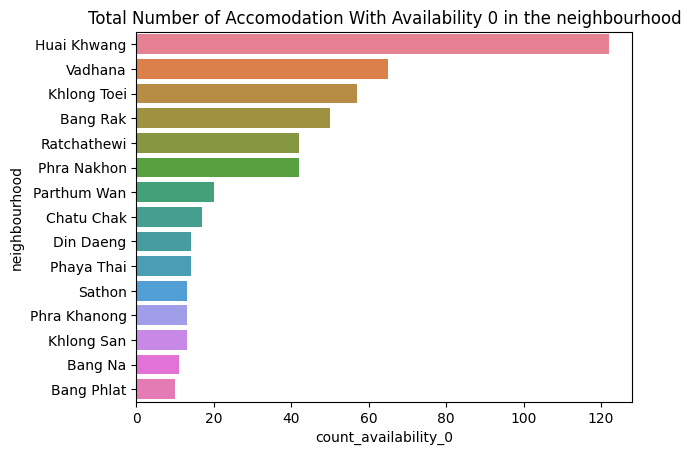

In [63]:
sns.barplot(
    data=neighbourhood_availability0.head(15),
    x = 'count_availability_0',
    y = 'neighbourhood',
    hue='neighbourhood'
)
plt.title("Total Number of Accomodation With Availability 0 in the neighbourhood")
plt.show()

Hunian yang paling banyak tidak dapat disewa atau dihuni terdapat di distrik Huai Khwang dengan jumlah 122 hunian, 2x lebih banyak dari distrik sebelumnya yaitu Vadhana dengan 65 hunian.

In [64]:
availability_0_year = availability_0.groupby(availability_0['last_review'].dt.year)['id'].size().reset_index()
availability_0_year


,last_review,id
0,2014,1
1,2015,1
2,2016,6
3,2017,16
4,2018,45
5,2019,110
6,2020,232
7,2021,34
8,2022,156


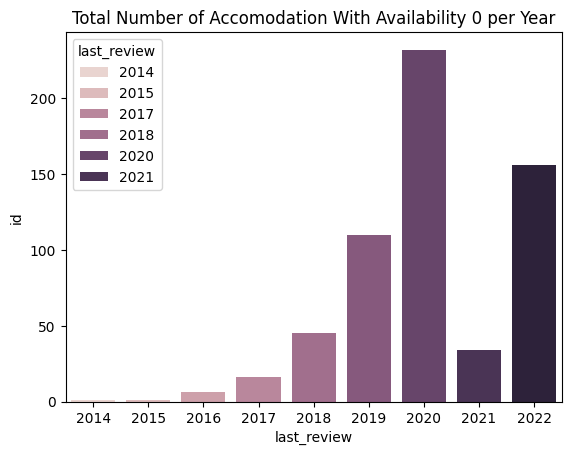

In [65]:
sns.barplot(
    data=availability_0_year,
    x = 'last_review',
    y = 'id',
    hue= 'last_review'
)
plt.title("Total Number of Accomodation With Availability 0 per Year")
plt.show()

Tingginya tingkat hunian yang tidak dapat dihuni pada tahun 2020 dapat diambil kesimpulan karena adanya pandemi covid-19 dan kemudian menurun drastis di tahun 2021. Namun, pada tahun 2022, tingkat hunian yang tidak dapat dihuni kembali meningkat cukup tinggi dari tahun 2021.

Minimum Nights

In [66]:
bins = [1, 2, 4, 7, 14, 30, 60, 90, 120, df['minimum_nights'].max()]
labels = ["1-2 nights", "3-4 nights", "5-7 nights", "8-14 nights", "15-30 nights", "31-60 nights", "61-90 nights", "91-120 nights", "120+ nights"]
df["min_nights_group"] = pd.cut(df["minimum_nights"], bins=bins, labels=labels, right=False)

# Analyzing the impact of grouped minimum nights on price, reviews, and availability
min_nights_analysis = df.groupby("min_nights_group").agg(
    med_price=("price", "median"),
    total_reviews=("number_of_reviews", "sum"),
).reset_index()

C:\Users\Legion\AppData\Local\Temp\ipykernel_8880\1680740090.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_nights_analysis = df.groupby("min_nights_group").agg(


C:\Users\Legion\AppData\Local\Temp\ipykernel_8880\1424163148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=min_nights_analysis, x="min_nights_group", y="med_price", palette="viridis")


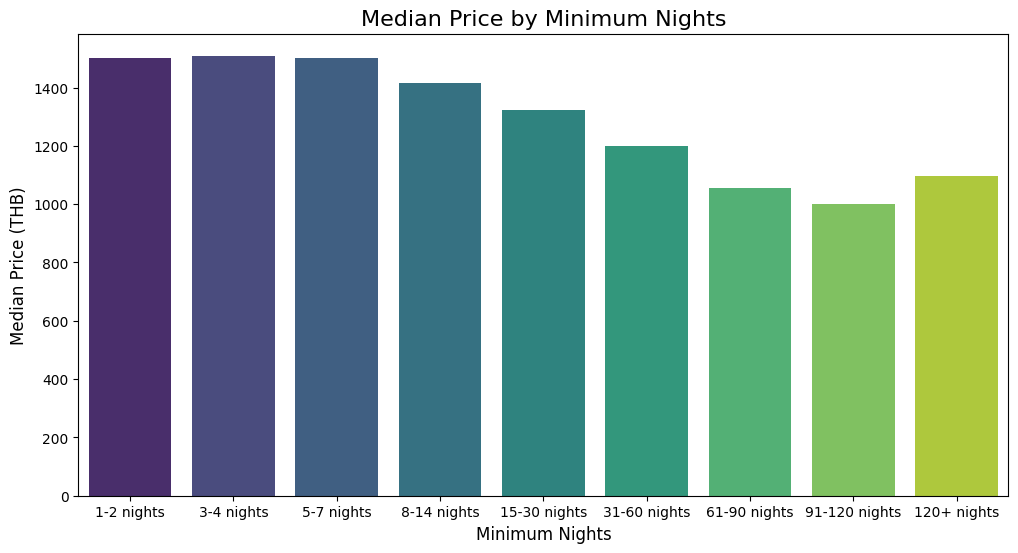

In [67]:
# Average Price by Minimum Nights
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=min_nights_analysis, x="min_nights_group", y="med_price", palette="viridis")

plt.title("Median Price by Minimum Nights", fontsize=16)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Median Price (THB)", fontsize=12)
plt.show()

Dilihat berdasarkan minimal bermalam pada tiap hunian, ternyata median harga dari semua rentang relatif stabil, berkisar 1000 - 1500 Baht

C:\Users\Legion\AppData\Local\Temp\ipykernel_8880\168175315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=min_nights_analysis, x="min_nights_group", y="total_reviews", palette="viridis")


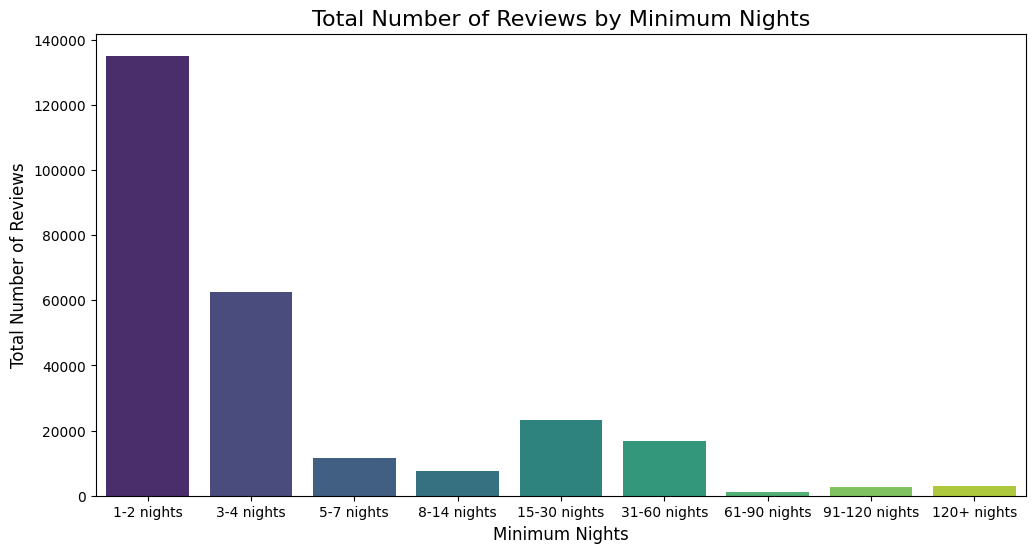

In [68]:
# Average Price by Minimum Nights
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=min_nights_analysis, x="min_nights_group", y="total_reviews", palette="viridis")

plt.title("Total Number of Reviews by Minimum Nights", fontsize=16)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Total Number of Reviews", fontsize=12)
plt.show()

Namun, jika dilihat berdasarkan total review berdasar minimal bermalam, hunian-hunian yang memiliki aturan minimal bermalam hanya 1-2 hari memiliki jumlah review yang sangat jauh dibanding hunian-hunian dengan aturan minimal bermalam yg lebih banyak. 

In [69]:
# df.to_excel(
#     excel_writer='Airbnb Listings Bangkok.xlsx',
#     engine='openpyxl'
# )

# df_clean.to_excel(
#     excel_writer='Airbnb Listings Bangkok Clean.xlsx',
#     engine='openpyxl'
# )